# COGS 108 - Final Project 

# Overview

With the COVID-19 pandemic impacting the entire world, staying at home has become the new normal. Parks are now positioned to play a very important role in our society because they allow us to go outside, excercise, have picnics with friends/family, and spend time in nature safely and with proper social distancing. One difficult part of the pandemic has been it's effect on the population's physical and mental well-being so, parks have been an increasingly popular place for people to go. This study looks into the most popular parks and the amenities they offer. Now that a large majority of the population are moving towards regular use of parks, what amenities do park users want to see in their parks. Are regular parks with access to places to sit more popular than parks with excercise equipments. By using Yelp ratings and natural language processing as well as frequency of visits to the park we can examine how popular parks with certain amenities are in comparison to others.

# Name & GitHub ID

- Name: Moraa Ogamba
- GitHub Username: nogamba

# Research Question

Parks have become and increasingly important part of people's lives with the world moving towards more outdoor activities in which people can properly social distance. Does including park amenities, such as athletic equipment, family areas, picnic areas etc. improve park ratings?

## Background and Prior Work

Parks offer a space for people to host picnics, relax, meet with friends to socialize at a distance and commune with nature. But one thing that San Diego parks might have to invest in as the times change is the access to more amenities such as outdoor exercise equipement, family areas, and more in open air spaces. Parks are now becoming a more central part of people's lives and improving the facilities available will be key to integrating parks into more people's lives and may even result in health improvements for community members.

There are a number of park amenities that attract community memebers to parks.Outdoor fitness equipment (OFE) has been around for over 40 years and tend to include static pieces of equipment (1). OFE was appealing because it allowed people to escape traditional gym settings and exercise in a more open environment. Companies that fit parks with these kinds of gym equipement have a vast number of designs and set-ups that they have proven to be successful (1). Today the appeal for OFE might be even more due to the current global situation with COVID-19. Additionally, families are increasingly in need of spaces where their children can enjoy outdoor space since close indoor contact is not a popular option. Playgrounds offer a place for families to spend time together especially if they do not have backyards of their own, and gives children the chance to enjoy nature especially in urban areas. Other amenities that are often found in parks include park benches, picnic areas, and shaded structures.

A prior study done in 2019 of the impact of parks on a community looked at whether park features affected park usage and accessibility (2). The results found that park features had an impact on park usage and physical activity, and they took into account cleanliness and location as well (2).


References (include links):
- 1) https://www.athleticbusiness.com/outdoor/what-to-consider-when-adding-outdoor-fitness-to-a-park.html
- 2) https://www.hindawi.com/journals/jeph/2017/7582402/
- 3) https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-13-1216

# Hypothesis


Because parks are becoming more and more important, I believe that adding adding amenities such as Outdoor Fitness Equipment, playgrounds, benches and picnic spots will encourage community members to visit the parks and in turn result in higher park ratings. There is a possibility that other aspects can impact the ratings that community members give the parks such as location and community, but we could still examine if a correlation exists between parks amenities and ratings.

# Dataset(s)

- Dataset Name: yelp_SD_reviews.csv
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_reviews.csv
- Number of observations: 2333 rows X 3 columns

This dataset contains the location, names and ratings of parks in San Diego. It also includes text data of a review written about the park.

# Setup

In [1]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Import nltk package 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Vectorizer, which transforms text data into bag-of-words feature
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [2]:
# Download the NLTK English tokenizer and the stopwords of all languages
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/nogamba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nogamba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Helper functions

def standardize_text(dataset):
    for i in range(0, 2333):
        #Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', str(dataset['text'][i]))

        #Convert to lowercase
        text = text.lower()

        #remove tags
        text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
      
        # remove special characters and digits
        text=re.sub("(\\d|\\W)+"," ",text)
    
        dataset['text'][i] = str(text);

def convert_rating(rating):
    if rating >= 4:
        return "positive"
    elif (rating < 3):
        return "negative"
    else:
        return "neutral"


# Data Cleaning

For the yelp_SD_reviews.csv dataset I mainly focused on cleaning the text data for the reviews. I used a standardize_text() function to remove punctuation, remove any tags or special characters and change all the words to lowercase. For both datasets, I also converted the ratings into sentiments using a custom function convert_rating(). For ratings >= 4 I set them as "positive", for ratings < 3 I set them to "negative", and the remaining values were set to "neutral". Lastly, I dropped any null values in the panda dataframe.

In [4]:
# Load datasets into panda dataframes
yelp_SD_reviews = pd.read_csv("https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_reviews.csv")

# Rename columns
yelp_SD_reviews.rename(columns={'id': 'name'}, inplace=True)

In [5]:
# label reviews as positive, negative, or neutral
yelp_SD_reviews["label"] = yelp_SD_reviews["rating"].apply(convert_rating)

In [6]:
# Clean the review text
standardize_text(yelp_SD_reviews)  

In [7]:
# Drop null values in category, delete original column categories and reset the index
yelp_SD_reviews = yelp_SD_reviews.dropna(axis=0, subset=['rating'])

# Display dataset preview
yelp_SD_reviews.head(5)

,name,rating,text,label
0,Balboa Park,5,balboa park is a must see when coming to san d...,positive
1,Balboa Park,5,beautiful grounds even to take a stroll during...,positive
2,Balboa Park,5,beautiful sightseeing in san diego lots of wal...,positive
3,Civita Park,5,was invited to child s b day party pre covid t...,positive
4,Civita Park,5,pretty nice park beautiful design anyone is we...,positive


# Data Analysis & Results

First, I looked at the descriptive analysis of reviews to get an idea of how long reviews were on average, how many total words there were and other features to determine how to customize the TF-IDF function.

In [8]:
# Fetch wordcount for each text review
yelp_SD_reviews['word_count'] = yelp_SD_reviews['text'].apply(lambda x: len(str(x).split(" ")))

# Descriptive statistics of word counts
yelp_SD_reviews.word_count.describe()

count    2333.000000
mean       29.561937
std         3.417635
min         8.000000
25%        28.000000
50%        30.000000
75%        32.000000
max        44.000000
Name: word_count, dtype: float64

Then I used this data to create a list of custom stop words for the vectorizer.

In [9]:
# Create a vocabulary of words
# Identify common words
freq = pd.Series(' '.join(yelp_SD_reviews['text']).split()).value_counts()[:30]

# Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

# Creating a list of custom stopwords
new_words = freq.index
stop_words = stop_words.union(new_words)

Using the CountVectorizer to transform the clean text data into vectors without stop_words to perform analysis. And then transformed it using TfidfTransformer to get feature names.

In [10]:
# Transform data into vectors
vectorizer = CountVectorizer(analyzer='word', max_features=2000, tokenizer=word_tokenize, 
                                 stop_words=stop_words)

# Transform reviews yelp_SD_reviews into vectors using the vectorizer
yelp_review_vector = vectorizer.fit_transform(yelp_SD_reviews['text'])

In [11]:
# Transfor count vectorizer to td-idf
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True).fit(yelp_review_vector)

# get feature names
feature_names = vectorizer.get_feature_names()

#generate tf-idf for the given document
tf_idf_vector = tfidf_transformer.transform(vectorizer.transform(yelp_SD_reviews['text']))

Defined a helper function that calculate the top TF-IDF features per review and a second helper funtion to calculate the the top average TF-IDF features of all the reviews. Those functions were then utilized by a third function, top_feats_by_class() that returned a list of features that corresponded to each label ("positive", "negative", and "neutral").

In [12]:
# Get top n tfidf values in row and return them with their corresponding feature names.
def top_tfidf_feats(row, features, top_n=30):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    
    return df

# Return the top n features that on average are most important amongst all documents
# or amongst the specific document class labels.
def top_mean_feats(vector, features, grp_ids=None, min_tfidf=0.3, top_n=30):
    if grp_ids:
        D = vector[grp_ids].toarray()
    else:
        D = vector.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    
    return top_tfidf_feats(tfidf_means, features, top_n)

In [13]:
# Return a list of dfs, where each df holds top_n features and their mean tfidf value
# calculated across documents with the same class label. '''
def top_feats_by_class(vector, rating_types, features, min_tfidf=0.3, top_n=30):
    df_feats = []
    labels = np.unique(rating_types)
    for label in labels:
        ids = np.where(rating_types==label)
        feats_df = top_mean_feats(vector, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        df_feats.append(feats_df)
    return df_feats


df_feats = top_feats_by_class(tf_idf_vector, yelp_SD_reviews['label'], feature_names)

Ploting the top features by label.

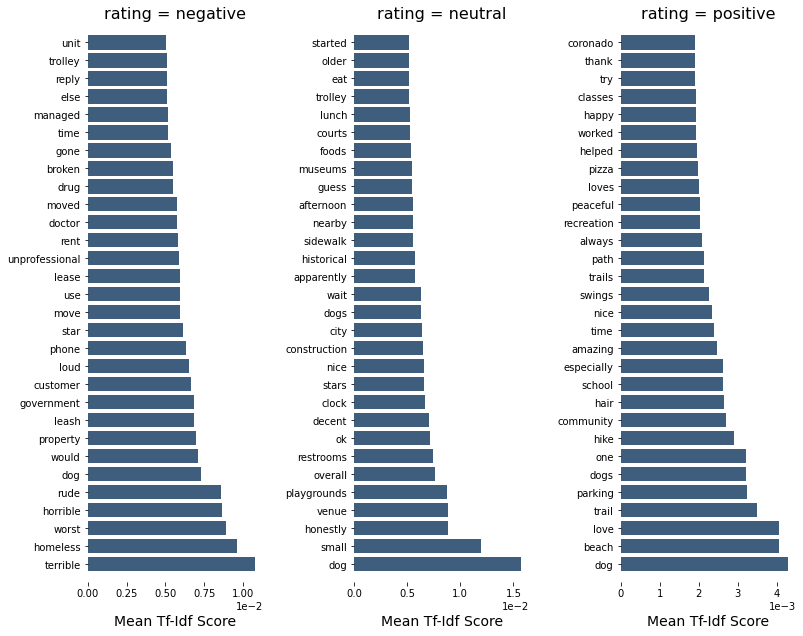

In [14]:
# Plot the data frames returned by the function plot_tfidf_classfeats().
def plot_tfidf_feats(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    
    # Loop through each class label and create plot
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("rating = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()
    
plot_tfidf_feats(df_feats)

Then, I extracted testing and training data to see how well the TF-IDF function classified reviews as a check for the functionality of extracting features. Used an SVM classifier to train the data.

In [15]:
# Carry out classification analysis to check accuracy of TF-IDF
yelp_ratings = np.array(yelp_SD_reviews["label"])

# Split training and testing data
num_training = int(len(yelp_ratings)*0.8)
num_testing = len(yelp_ratings)-num_training

# Split vector into training and testing
yelp_train_X = tf_idf_vector[:num_training]
yelp_train_y = yelp_ratings[:num_training]
yelp_test_X = tf_idf_vector[num_training:]
yelp_test_y = yelp_ratings[num_training:]

In [16]:
# Initialize SVM to output trained classifier
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, y)
    return clf

yelp_clf = train_SVM(yelp_train_X, yelp_train_y)
yelp_predicted_train_y = yelp_clf.predict(yelp_train_X)
yelp_predicted_test_y = yelp_clf.predict(yelp_test_X)

In [17]:
print(classification_report(yelp_train_y, yelp_predicted_train_y))

              precision    recall  f1-score   support

    negative       0.99      0.52      0.68       207
     neutral       1.00      0.08      0.14       144
    positive       0.87      1.00      0.93      1515

    accuracy                           0.87      1866
   macro avg       0.95      0.53      0.58      1866
weighted avg       0.89      0.87      0.84      1866



In [18]:
print(classification_report(yelp_test_y, yelp_predicted_test_y))

              precision    recall  f1-score   support

    negative       0.86      0.09      0.17        65
     neutral       0.00      0.00      0.00        42
    positive       0.78      1.00      0.88       360

    accuracy                           0.78       467
   macro avg       0.55      0.36      0.35       467
weighted avg       0.72      0.78      0.70       467



# Ethics & Privacy

Since yelp reviews are public information, it is assumed that the person posting the reviews knows that it will be public and can be accessed by anyone. However, for the data I used, there was no information stating who wrote the review and so it was anonymous. Additionally, for privacy I removed any information about the parks such as phone number and ID, but since those are also publically available people can still access that information.
I also only conducted the analysis on parks that were in the San Diego area, so generalizing data to other areas would be inaccurate because of the sample. Lastly, because many of the reviews were quite short, the data may be exaggerated and without correcting for context it might be difficult to completely confirm the results below.

# Conclusion & Discussion

After conducting the TF-IDF analysis and plotting the top most popular features by labels, it is somewhat clear that having certain amenities increases the rating of a park. For reviews that included words like "dog", "playgroud", "hike", "trail", "parking", "beach", "swings", "recreation", "restroom", "play", and more typically fell in the neutral to positive range for reviews. Words like "dog" and "play" imply large open spaces and room for people to bring dogs to roam or their kids to play. Whereas words like "recreation", "trail", and "hike" imply that there are other activities besides sitting and having a picnic that community members can participate. Additionally, words like "restroom", "food", "peaceful", and others imply that there are amenities that provide a relaxing space for community members. The TF-IDF analysis was mostly accurate because after running it on training and testing data it was able to accurately classify reviews based on their label and had a 0.77 accuracy rate. So, the effectiveness of the TF-IDF model can be trusted on this particular dataset. Overall, the TF-IDF analysis showed that these particular words had a higher mean score amongst all the reviews and thus, were a good predictor of whether the review would be positive, negative, or neutral. This shows that adding amenties to parks is correlated to an increase in the ratings that people give that park. A limitation of this study is that a few features were sometime classified wrong. For example, "dog" showed up in all three labels (positive, negative, and neutral) meaning that in different contexts having space for "dogs" might be negative for some people who are looking for a quieter park. So, outlining amenities provided to the public is also important to encouraging positive reviews as community memebers will visit parks with amenities they prefer.